# Imports

In [9]:
import numpy as np
import os
import sys
import pickle
from functools import reduce
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, IntSlider
import ipywidgets as widgets
from scipy import stats
import scipy
from matplotlib.animation import FuncAnimation
#import imageio

## Helper Functions

In [10]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [11]:
%store -r path_CalData
# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to load Calculated Thickness Data
%store -r thick_CalData
# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Loading Matching between Thickness Regions (400) to Pathology Regions (40)

In [12]:
with open(os.path.join(path_dataDir, 'pathToAtlasIndex.pkl'), 'rb') as f:
    pathToAtlasIndex = pickle.load(f)
f.close()

## Volume At Path Covariance Matrices - Dictionaries (W Score) / TAU, TDP --> Dropped

In [13]:
# cov_volAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Volume(400 x 400) Covariance Matrices - Dictionaries (W Score) 

In [14]:
# cov_vol_w_dict
with open(os.path.join(thick_CalData, 'cov_vol_w_dict.pkl'), 'rb') as f:
    cov_vol_w_dict = pickle.load(f)
f.close()

## Pathology Data

### Loading Pathology Data (log %AO) / TAU, TDP --> Dropped

In [15]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

### Loading Pathology CoM

In [16]:
# pathCoM
with open(os.path.join(path_dataDir, 'pathCoM.pkl'), 'rb') as f:
    pathCoM = pickle.load(f)
f.close()

pathCoM = np.vstack((pathCoM[:, :, 0], pathCoM[:, :, 1]))

# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

### Loading Pathology Region Names

In [17]:
# LabelNames
with open(os.path.join(path_CalData, 'LabelNames.pkl'), 'rb') as f:
    LabelNames = pickle.load(f)
f.close()

# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

### Missing Index (=few observations) from Pathology Dataset

#### TAU 

In [18]:
# TAU_missing_index
with open(os.path.join(path_CalData, 'TAU_missing_index.pkl'), 'rb') as f:
    TAU_missing_index = pickle.load(f)
f.close()

#### TDP

In [19]:
# TDP_missing_index
with open(os.path.join(path_CalData, 'TDP_missing_index.pkl'), 'rb') as f:
    TDP_missing_index = pickle.load(f)
f.close()

# Log %AO vs Nodal Strength of Volume At Path (W Score for 40x40)

### Normalize each TAU and TDP separately (to range -1, 1)

In [20]:
# Min/Max Range of Normalizing
t_min = -1
t_max = 1

In [21]:
# normalizing TAU EXCLUDING NaN!
path_TAU_Drop_Norm = norm.normalize2d(path_TAU_Drop, t_min, t_max)

In [22]:
# normalizing TDP EXCLUDING NaN!
path_TDP_Drop_Norm = norm.normalize2d(path_TDP_Drop, t_min, t_max)

## Min Max of Mean Pathology Log %AO

In [23]:
pathOrig = np.concatenate((np.nanmean(path_TAU_Drop_Norm, axis=0), 
                           np.nanmean(path_TDP_Drop_Norm, axis=0)))

ymin = np.min(pathOrig)
ymax = np.max(pathOrig)

# Log %AO vs Nodal Strength of Volume At Path (W-Score for 400x400)

Orange/Red - Close

Blue/Green - Far

## Using Covariance Matrix as Measure of Close/Far

### Validating the Covariance Matrix

In [24]:
# cov_thick_dict
with open(os.path.join(thick_CalData, 'cov_thick_dict.pkl'), 'rb') as f:
    cov_thick_dict = pickle.load(f)
f.close()

# cov_vol_dict
with open(os.path.join(thick_CalData, 'cov_vol_dict.pkl'), 'rb') as f:
    cov_vol_dict = pickle.load(f)
f.close()

# volHC
with open(os.path.join(thick_CalData, 'volHC.pkl'), 'rb') as f:
    volHC = pickle.load(f)
f.close()

# HC_vol_w
with open(os.path.join(thick_CalData, 'HC_vol_w.pkl'), 'rb') as f:
    HC_vol_w = pickle.load(f)
f.close()

#### Checking the volume data

In [25]:
volHC.shape

(54, 400)

In [26]:
np.sum(np.isnan(volHC))

0

In [27]:
HC_vol_w.shape

(54, 400)

In [28]:
np.sum(np.isnan(HC_vol_w))

0

#### Analyzing why NaN values come up

In [29]:
# import covariance as cov
# temp = cov.covCal(HC_vol_w, HC_vol_w, 0.1)
# np.sum(np.isnan(temp))

In [30]:
# temp1 = cov.covCal(HC_vol_w, HC_vol_w, 0.0)
# np.sum(np.isnan(temp1))
# # 44602 are for where the covariance are negative.

In [31]:
# np.sum(np.isnan(cov_thick_dict['HC']))

In [32]:
# np.sum(np.isnan(cov_vol_dict['HC']))

In [33]:
# np.sum(np.isnan(cov_vol_w_dict['HC']))

#### Is there NaN Values?

##### HC

In [34]:
np.sum(np.isnan(cov_vol_w_dict['HC']))

82024

In [35]:
perc_hc = np.sum(np.isnan(cov_vol_w_dict['HC'])) / (cov_vol_w_dict['HC'].shape[0] * cov_vol_w_dict['HC'].shape[1]) * 100
print(f"{perc_hc}%")

51.26500000000001%


##### TAU

In [36]:
np.sum(np.isnan(cov_vol_w_dict['TAU']))

64436

In [37]:
perc_tau = np.sum(np.isnan(cov_vol_w_dict['TAU'])) / (cov_vol_w_dict['TAU'].shape[0] * cov_vol_w_dict['TAU'].shape[1]) * 100
print(f"{perc_tau}%")

40.2725%


##### TDP

In [38]:
np.sum(np.isnan(cov_vol_w_dict['TDP']))

77286

In [39]:
perc_tdp = np.sum(np.isnan(cov_vol_w_dict['TDP'])) / (cov_vol_w_dict['TDP'].shape[0] * cov_vol_w_dict['TDP'].shape[1]) * 100
print(f"{perc_tdp}%")

48.30375%


### pathToAtlasIndex_list

list of len 40. Each element denoting the array of indices mapping Thickness Region to Pathology Region

In [40]:
pathToAtlasIndex_list = []

for i in range(len(pathToAtlasIndex)):
    curr_l = pathToAtlasIndex[i][0]
    pathToAtlasIndex_list.append(curr_l)

for i in range(len(pathToAtlasIndex)):
    curr_r = pathToAtlasIndex[i][1]
    pathToAtlasIndex_list.append(curr_r)

### Drop The regions with insufficient number of observations from Pathology Log %AO

#### TAU

In [41]:
pathToAtlasIndex_list_TAU = pathToAtlasIndex_list.copy()

for i in TAU_missing_index[::-1]:
    del pathToAtlasIndex_list_TAU[i]

#### TDP

In [42]:
pathToAtlasIndex_list_TDP = pathToAtlasIndex_list.copy()

for i in TDP_missing_index[::-1]:
    del pathToAtlasIndex_list_TDP[i]

### TAU

In [43]:
strong_connection_at_path_list_TAU = []

for i in range(len(pathToAtlasIndex_list_TAU)):
    # For each Pathology Node
    connection_list = []
    for j in pathToAtlasIndex_list_TAU[i]: # Get indices of equivalent Thickness region (out of 400)
        # Get indices of thickness regions that is connected (Not NaN)
        connections = np.argwhere(~np.isnan(cov_vol_w_dict['HC'][j])).flatten() 
        # Save each connections into a list
        connection_list.append(connections)

    # Get connection that is intersecting with all of the equivalent Thickness regions
    strong_connection_list = reduce(np.intersect1d, connection_list)

    # Get the indicies of the pathology regions (that is strongly connected)
    strong_connection_at_path = []
    for index in range(len(pathToAtlasIndex_list_TAU)):
        for el in strong_connection_list:
            if el in pathToAtlasIndex_list_TAU[index]:
                strong_connection_at_path.append(index)

    # Get only the unique strongly connected pathology regions             
    strong_connection_at_path = np.unique(np.array(strong_connection_at_path))

    strong_connection_at_path_list_TAU.append(strong_connection_at_path)

In [44]:
len(strong_connection_at_path_list_TAU)

32

<Figure size 640x480 with 0 Axes>

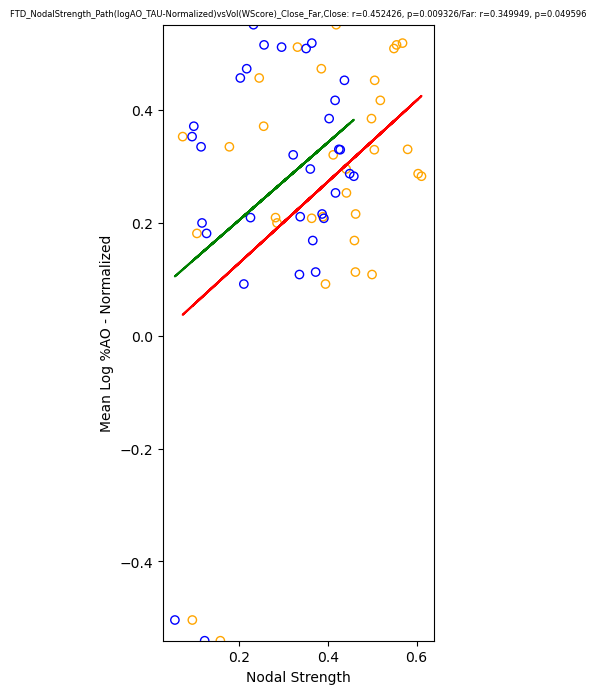

In [45]:
ns.nonZeroDegCorrCloseFar(path_TAU_Drop_Norm, cov_volAtPath_w_dict_Drop["TAU"], 
                       strong_connection_at_path_list_TAU,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far', 
                       linear_regression = True)

### TDP

In [46]:
strong_connection_at_path_list_TDP = []

for i in range(len(pathToAtlasIndex_list_TDP)):
    # For each Pathology Node
    connection_list = []
    for j in pathToAtlasIndex_list_TDP[i]: # Get indices of equivalent Thickness region (out of 400)
        # Get indices of thickness regions that is connected (Not NaN)
        connections = np.argwhere(~np.isnan(cov_vol_w_dict['HC'][j])).flatten() 
        # Save each connections into a list
        connection_list.append(connections)

    # Get connection that is intersecting with all of the equivalent Thickness regions
    strong_connection_list = reduce(np.intersect1d, connection_list)

    # Get the indicies of the pathology regions (that is strongly connected)
    strong_connection_at_path = []
    for index in range(len(pathToAtlasIndex_list_TDP)):
        for el in strong_connection_list:
            if el in pathToAtlasIndex_list_TDP[index]:
                strong_connection_at_path.append(index)

    # Get only the unique strongly connected pathology regions             
    strong_connection_at_path = np.unique(np.array(strong_connection_at_path))

    strong_connection_at_path_list_TDP.append(strong_connection_at_path)

In [47]:
strong_connection_at_path_list_TDP[0]

array([ 1,  3,  4,  6, 11, 13, 15, 16, 19, 21, 22, 30])

<Figure size 640x480 with 0 Axes>

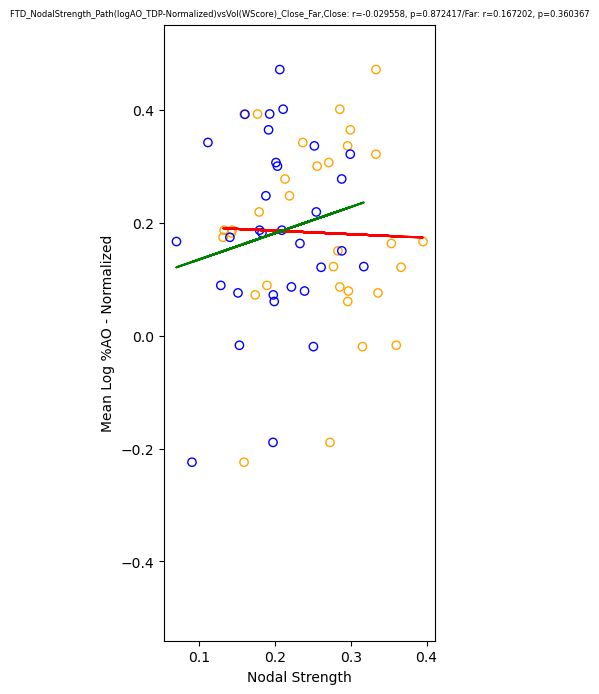

In [48]:
ns.nonZeroDegCorrCloseFar(path_TDP_Drop_Norm, cov_volAtPath_w_dict_Drop["TDP"], 
                       strong_connection_at_path_list_TDP,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far', 
                       linear_regression = True)

## Using Euclidean Distance as Measure of Close/Far

### Calculate all the distances between 40 Nodes

In [49]:
# Calculate all the ecl distances between 40 Nodes (40*39/2 = 780 distances)
dist_list = []
for i in range(pathCoM.shape[0]):
    for j in range(i+1, pathCoM.shape[0]):
        # Get point 1 and 2
        point1 = pathCoM[i, :]
        point2 = pathCoM[j, :]
        
        # Calculate the ecl distance
        dist = np.linalg.norm(point1 - point2)
        
        # Append the distance to the list
        dist_list.append(dist)

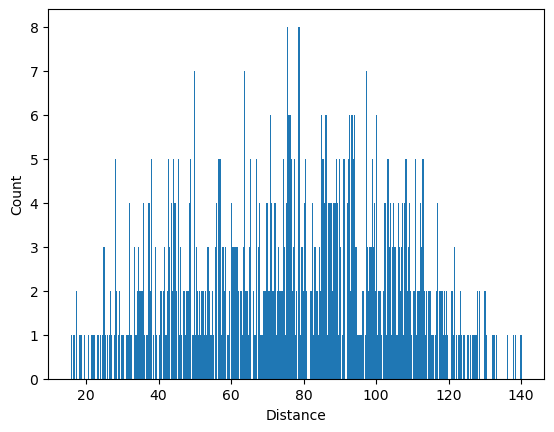

In [50]:
# Show the distribution of the distances
n_bins = np.ceil(np.sqrt(pathCoM.shape[0] * (pathCoM.shape[0] - 1) / 2)).astype('int')
plt.hist(dist_list, bins=400)
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show()

### Generate 2d Matrix for each distance between.

In [51]:
# Calculate all the ecl distances between 40 Nodes (40*39/2 = 780 distances)
dist_mat = np.zeros((pathCoM.shape[0], pathCoM.shape[0]))
for i in range(pathCoM.shape[0]):
    for j in range(pathCoM.shape[0]):
        # Get point 1 and 2
        point1 = pathCoM[i, :]
        point2 = pathCoM[j, :]
        
        # Calculate the ecl distance
        dist = np.linalg.norm(point1 - point2)
        
        # Save the distance to the matrix
        dist_mat[i, j] = dist

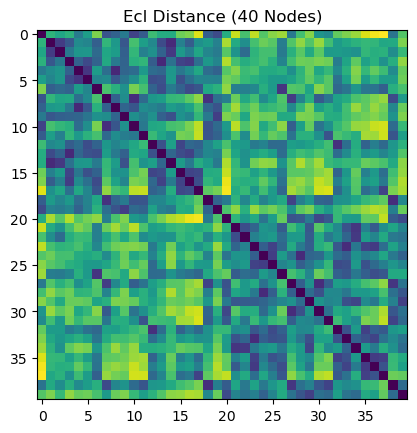

In [52]:
plt.imshow(dist_mat)
 
plt.title("Ecl Distance (40 Nodes)")
plt.show()

#### Helper Functions

In [53]:
def get_indices_below_threshold(array, threshold):
    # Get the boolean mask for values below the threshold
    below_threshold_mask = array < threshold

    # Use np.where to get indices where the mask is True for each row
    indices_below_threshold = [np.where(row_mask)[0] for row_mask in below_threshold_mask]

    return indices_below_threshold

In [54]:
def nodalStrengthCloseFar(DataX, covMatX, close_connection_list, 
                           ymin, ymax, title, x_label, y_label, 
                           outputDir, outputName, linear_regression = False, savefig=True):
    
    # Copy the Covariance Matrix and set negative values as zero
    covMatXnz = covMatX.copy()
    covMatXnz[covMatXnz < 0] = 0
    
    # Get sum of covariance values for all regions respective to each region
    # Similar to computing the degree of nodes in a Network
    degX = np.sum(covMatXnz, axis=0, where=~np.isnan(covMatXnz)) 
    
    # Divide the Covariance Matrix to Close and Far
    deg_close_array = []
    for i in range(covMatXnz.shape[1]): # For each column in array
        # Get the column
        col = covMatXnz[:, i]

        # Get the Close indices for that col (region)
        close_ind = close_connection_list[i]

        # Get the Degree for Close
        deg_close = np.nansum(col[close_ind])
        deg_close_array.append(deg_close)

    # Convert Deg Close to numpy
    deg_close = np.array(deg_close_array)
    
    # Get Deg Far
    deg_far = degX - deg_close_array
    
    # Normalize the Degree Sum (Due to difference in number of nodes that is close vs far)
    # Get Number of Close/Far Nodes
    closeNum = [len(sublist) for sublist in close_connection_list]
    farNum = (np.zeros((len(close_connection_list), ), dtype=int) + len(close_connection_list)) - closeNum
    
#     farNum += 0.00001
    
    deg_close = deg_close/closeNum
    deg_far = deg_far/farNum
    
    # Define figure
    fig = plt.figure()
    
    # Figure size
    #plt.figure(figsize=(3.5,8))

    # Draw Scatter Plot 
    # Close - empty circle with green edges
    plt.scatter(deg_close, np.nanmean(DataX, axis=0), facecolors='none', edgecolors='orange')
    # Far - empty circle with blue edges
    plt.scatter(deg_far, np.nanmean(DataX, axis=0), facecolors='none', edgecolors='blue')
    # set yaxis range
    plt.ylim(ymin, ymax)
    
    # Get r and p-value
    r_close, p_close = scipy.stats.pearsonr(deg_close, np.nanmean(DataX, axis=0))
    r_far, p_far = scipy.stats.pearsonr(deg_far, np.nanmean(DataX, axis=0))
 
    # Set title
    plt.title(title + f",Close: r={r_close:.6f}, p={p_close:.6f}/Far: r={r_far:.6f}, p={p_far:.6f}", fontsize=6)
   
    # Draw Linear Regression Line (is set to True)
    if linear_regression:
        # Obtain m (slope) and b(intercept) of linear regression line
        m_close, b_close = np.polyfit(deg_close, np.nanmean(DataX, axis=0), 1)
        m_far, b_far = np.polyfit(deg_far, np.nanmean(DataX, axis=0), 1)
        
        #add linear regression line to scatterplot 
        plt.plot(deg_close, m_close*deg_close+b_close, color="red")
        plt.plot(deg_far, m_far*deg_far+b_far, color="green")

    # Set X and Y Labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show Figure
    plt.show()
    

### TAU

#### Drop the index with low observations - TAU

In [55]:
dist_mat_TAU = np.delete(dist_mat, TAU_missing_index, axis=0)
dist_mat_TAU = np.delete(dist_mat_TAU, TAU_missing_index, axis=1)

#### Generate Scatter Plot (TAU)

In [56]:
# Enable interactive plot
%matplotlib notebook

# Function to update scatter plot based on threshold
def update_plot(threshold):
    plt.clf()
    plt.close()
    # Get updated connections (Close - Strong)
    closeConnectionAtPath_list_TAU = get_indices_below_threshold(dist_mat_TAU, threshold)
    
    # Draw the Plot
    nodalStrengthCloseFar(path_TAU_Drop_Norm, cov_volAtPath_w_dict_Drop["TAU"], 
                       closeConnectionAtPath_list_TAU,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far(Ecl_Dist)', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TAU-Normalized)vsVol(WScore)_Close_Far(Ecl_Dist)', 
                       linear_regression = True, savefig=False)
    

# Create an interactive slider
threshold_slider = IntSlider(value=80, min=0, max=140, step=1, description='Threshold')

# Connect the slider to the update function
interactive_plot = interactive(update_plot, threshold=threshold_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=80, description='Threshold', max=140), Output()), _dom_classes=('widget-…

### TDP

#### Drop the index with low observations - TDP

In [57]:
dist_mat_TDP = np.delete(dist_mat, TDP_missing_index, axis=0)
dist_mat_TDP = np.delete(dist_mat_TDP, TDP_missing_index, axis=1)

#### Generate Scatter Plot (TDP)

In [58]:
# Enable interactive plot
%matplotlib notebook

# Function to update scatter plot based on threshold
def update_plot(threshold):
    plt.clf()
    plt.close()
    # Get updated connections (Close - Strong)
    closeConnectionAtPath_list_TDP = get_indices_below_threshold(dist_mat_TDP, threshold)
    
    # Draw the Plot
    nodalStrengthCloseFar(path_TDP_Drop_Norm, cov_volAtPath_w_dict_Drop["TDP"], 
                       closeConnectionAtPath_list_TDP,
                       ymin, ymax,
                       'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far(Ecl_Dist)', 
                       'Nodal Strength', 'Mean Log %AO - Normalized', 
                       outputDir = thickAtPath_Fig, 
                       outputName = 'FTD_NodalStrength_Path(logAO_TDP-Normalized)vsVol(WScore)_Close_Far(Ecl_Dist)', 
                       linear_regression = True, savefig=False)
    

# Create an interactive slider
threshold_slider = IntSlider(value=80, min=0, max=140, step=1, description='Threshold')

# Connect the slider to the update function
interactive_plot = interactive(update_plot, threshold=threshold_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=80, description='Threshold', max=140), Output()), _dom_classes=('widget-…

### Calculate all the distances between each Left and Right hemisphere (20 nodes each)

In [59]:
# Calculate all the ecl distances between 20 Nodes (20*19/2 = 190 distances) - Left Hemisphere
dist_list_L = []
for i in range(int(pathCoM.shape[0]/2)):
    for j in range(i+1, int(pathCoM.shape[0]/2)):
        # Get point 1 and 2
        point1 = pathCoM[i, :]
        point2 = pathCoM[j, :]
        
        # Calculate the ecl distance
        dist = np.linalg.norm(point1 - point2)
        
        # Append the distance to the list
        dist_list_L.append(dist)
        
# Calculate all the ecl distances between 20 Nodes (20*19/2 = 190 distances) - Right Hemisphere
dist_list_R = []
for i in range(int(pathCoM.shape[0]/2), pathCoM.shape[0]):
    for j in range(i+1, pathCoM.shape[0]):
        # Get point 1 and 2
        point1 = pathCoM[i, :]
        point2 = pathCoM[j, :]
        
        # Calculate the ecl distance
        dist = np.linalg.norm(point1 - point2)
        
        # Append the distance to the list
        dist_list_R.append(dist)

<IPython.core.display.Javascript object>


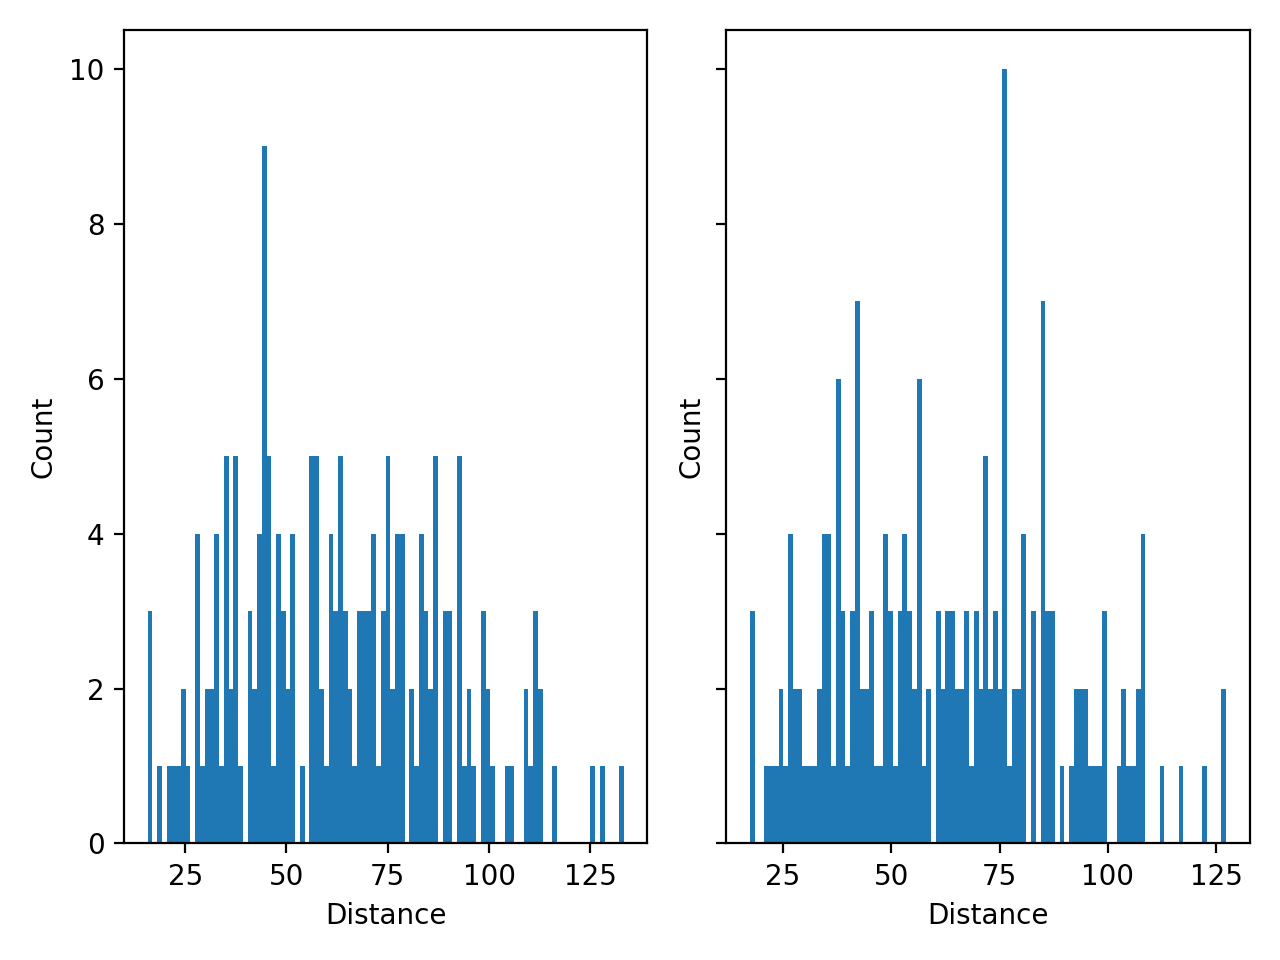

Text(0, 0.5, 'Count')

In [60]:
# Distribution of distances Left and Right separetely
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

n_bins = np.ceil(np.sqrt((pathCoM.shape[0]/2) * (pathCoM.shape[0]/2 - 1) / 2)).astype('int')

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist_list_L, bins=100)
axs[1].hist(dist_list_R, bins=100)
axs[0].set_xlabel("Distance")
axs[1].set_xlabel("Distance")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")